In [1]:
#import the neccessary libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
import pylab as pl
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
print("setup right")

setup right


In [3]:
#loading the dataset 
aave_data = pd.read_csv(r'C:\Users\joseph\Documents\coin_Aave.csv')
aave_data.head(3)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,583091.459763,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,682834.186323,6.713004e+07


In [4]:
#checking for null/nan values.
aave_data.isnull().values.any()

False

In [5]:
aave_data.info()
aave_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 10 columns):
SNo          146 non-null int64
Name         146 non-null object
Symbol       146 non-null object
Date         146 non-null object
High         146 non-null float64
Low          146 non-null float64
Open         146 non-null float64
Close        146 non-null float64
Volume       146 non-null float64
Marketcap    146 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 11.5+ KB


Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [6]:
aave_data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,146.000000,146.000000,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,73.500000,164.001100,142.949940,152.510304,154.511888,4.394728e+08,1.853665e+09
std,42.290661,156.486088,137.366237,146.198295,146.844868,4.377693e+08,1.856007e+09
min,1.000000,28.433069,25.966155,27.715080,27.715084,0.000000e+00,6.713004e+07
25%,37.250000,60.988168,50.418940,53.986936,54.746360,1.657845e+08,6.296389e+08
50%,73.500000,87.666625,77.500862,82.024712,82.770591,2.990149e+08,9.917703e+08
75%,109.750000,204.523318,183.928894,191.983494,196.576704,5.804791e+08,2.408807e+09
max,146.000000,559.122944,504.781660,529.829717,529.896175,2.838573e+09,6.558683e+09


In [7]:
#due to prior knowledge,machine model need just numbers to run smoothly,which means i will drop columns that contains object.
aave_data.drop("SNo", axis=1,inplace=True)
aave_data.drop("Name", axis=1,inplace=True)
aave_data.drop("Symbol", axis=1,inplace=True)
aave_data.drop("Date", axis=1,inplace=True)

In [8]:
aave_data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'], dtype='object')

In [9]:
#CHECKING FOR THE CORRELATION
aave_data.corr()

,High,Low,Open,Close,Volume,Marketcap
High,1.000000,0.995618,0.994983,0.998802,0.841199,0.997456
Low,0.995618,1.000000,0.995816,0.996286,0.803515,0.994907
Open,0.994983,0.995816,1.000000,0.993871,0.800082,0.992609
Close,0.998802,0.996286,0.993871,1.000000,0.838803,0.998735
Volume,0.841199,0.803515,0.800082,0.838803,1.000000,0.842891
Marketcap,0.997456,0.994907,0.992609,0.998735,0.842891,1.000000


In [10]:
#preparing my model for training and testing.
#Taking my attributes and labels.
#from the below code, i will train all volume(attribute) against Marketcap(label).

X = aave_data.drop('Close',axis = 1)
y = aave_data['Close']

#splitting the data into testing set and training set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)
#am using 20% from my data to test.

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 30, min_samples_split=10,min_samples_leaf=5,max_features=5,random_state=0)
regressor.fit(X_train, y_train)

#predicting the results.
y_pred = regressor.predict(X_test)


In [11]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df.head(2)

,Real Values,Predicted Values
7,52.238692,52.960811
24,29.098334,30.319566


In [12]:
#Evaluating the Algorithm,making use of  mean absolute error, mean squared error, and root mean squared error.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.002269762573148
Mean Squared Error: 157.2637817908131
Root Mean Squared Error: 12.540485707930658


In [13]:
#to calculate for the error,the closer to 1 then the model works well.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9899774218038496

In [14]:
# Visualising the Decision Tree Regression Results 
#X = np.arange(min(X), max(X), 0.1)
#X = X_grid((len(X_grid), 1))
#plt.scatter(X_test, y_test, color = 'red')
#plt.scatter(X_test, y_pred, color = 'green')
#plt.title('Decision Tree Regression')
#plt.xlabel('Volume')
#plt.ylabel('Close')
#plt.show()

#plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
#plt.title('Decision Tree Regression')
#plt.xlabel('Volume')
#plt.ylabel('Close')
#plt.show()

In [15]:
#MAKING USE OF RANDOM FOREST ALGORITHM.
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(n_estimators = 10, random_state=0)
regressor.fit(X_train, y_train)
y_pred= regressor.predict(X_test)

In [16]:
#Evaluating the Algorithm,making use of  mean absolute error, mean squared error, and root mean squared error.
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.528070347284456
Mean Squared Error: 138.4547995669702
Root Mean Squared Error: 11.766681756849303


In [17]:
#to calculate for the error,the closer to 1 then the model works well.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9907188956474403

In [37]:
Df= pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df.head(2)

,Real Values,Predicted Values
7,52.238692,52.960811
24,29.098334,30.319566


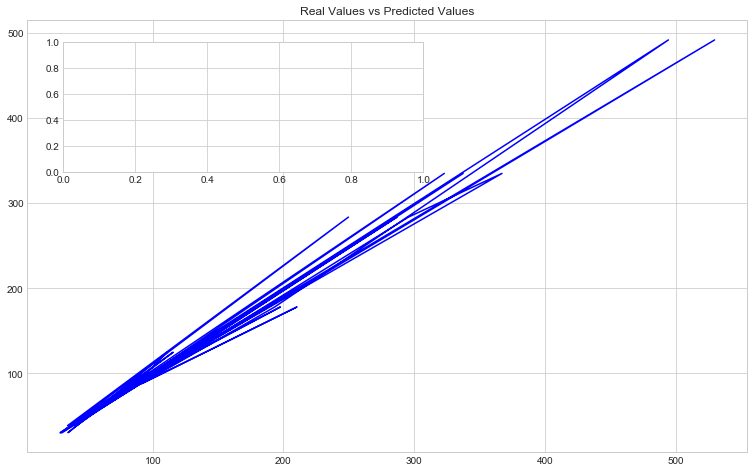

In [38]:
#Time to viualise
# Am using line graph, because Line graphs are used to track changes over short and long periods of time.
# Simple Line Plot

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0, 0, 1,1])
ax2 = fig.add_axes([0.05, 0.65, 0.5, 0.3])
ax1.set_title('Real Values vs Predicted Values')
ax1.plot(Df['Real Values'],Df['Predicted Values'],color='blue')
plt.show()

NameError: name 'DF' is not defined

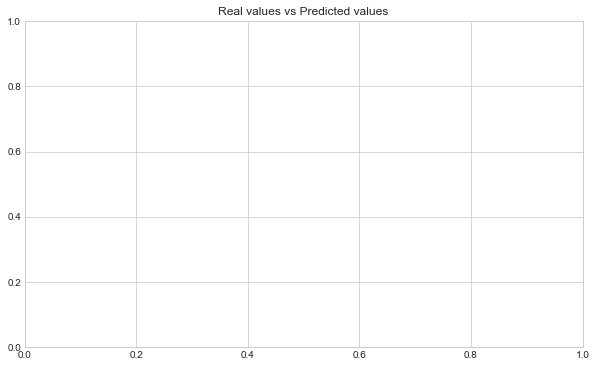

In [41]:
#USING BARCHART.
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Real values vs Predicted values")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=DF.index, y=DF['Predicted Values'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

In [42]:
plotdata = pd.DataFrame({"Real Values"})
plotdata.plot(kind="bar")

ValueError: DataFrame constructor not properly called!